# Fase 3: Diseño y entrenamiento de modelos
Vamos a entrenar el modelo de clasificación usando tanto el dataset balanceado como el desbalanceado, para así ver la diferencia en rendimiento.

In [16]:
%load_ext autoreload
%autoreload 2
import sys
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix

sys.path.append(os.path.abspath("../src"))
from models import SentimentClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Cargar datos

In [5]:
data_path = Path("../data/processed_corpus.csv")
balanced_path = Path("../data/processed_corpus_balanced.csv")

df = pd.read_csv(data_path)
balanced_df = pd.read_csv(balanced_path)

print(f"Loaded {len(df)} rows.")
display(df.head())

print(f"Loaded {len(balanced_df)} balanced rows.")
display(balanced_df.head())

C:\Users\otero\AppData\Local\Temp\ipykernel_3828\2994686318.py:4: DtypeWarning: Columns (0,1,5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


Loaded 253271 rows.


,id,text,source,language,sentiment_score,clean_text,tokens,lemmas,pos_tags,entities,lemmas_text,text_length
0,en_0199937,"These are AWFUL. They are see through, the fab...",amazon,en,bad,these are awful they are see through the fabri...,"['these', 'are', 'awful', 'they', 'are', 'see'...","['these', 'be', 'awful', 'they', 'be', 'see', ...","['DET', 'AUX', 'ADJ', 'PRON', 'AUX', 'VERB', '...","[{'text': 'don', 'label': 'PERSON', 'start': 2...",these be awful they be see through the fabric ...,286.0
1,en_0863335,I bought 4 and NONE of them worked. Yes I used...,amazon,en,bad,i bought 4 and none of them worked yes i used ...,"['i', 'bought', '4', 'and', 'none', 'of', 'the...","['I', 'buy', '4', 'and', 'none', 'of', 'they',...","['PRON', 'VERB', 'NUM', 'CCONJ', 'NOUN', 'ADP'...","[{'text': '4', 'label': 'CARDINAL', 'start': 9...",I buy 4 and none of they work yes I use new ba...,70.0
2,en_0565010,On first use it didn't heat up and now it does...,amazon,en,bad,on first use it didn't heat up and now it does...,"['on', 'first', 'use', 'it', 'did', ""n't"", 'he...","['on', 'first', 'use', 'it', 'do', 'not', 'hea...","['ADP', 'ADJ', 'NOUN', 'PRON', 'AUX', 'PART', ...","[{'text': 'first', 'label': 'ORDINAL', 'start'...",on first use it do not heat up and now it do n...,77.0
3,en_0963290,You want an HONEST answer? I just returned fro...,amazon,en,bad,you want an honest answer i just returned from...,"['you', 'want', 'an', 'honest', 'answer', 'i',...","['you', 'want', 'an', 'honest', 'answer', 'I',...","['PRON', 'VERB', 'DET', 'ADJ', 'NOUN', 'PRON',...","[{'text': 'first', 'label': 'ORDINAL', 'start'...",you want an honest answer I just return from u...,506.0
4,en_0238156,The glue works fine but the container is impos...,amazon,en,bad,the glue works fine but the container is impos...,"['the', 'glue', 'works', 'fine', 'but', 'the',...","['the', 'glue', 'work', 'fine', 'but', 'the', ...","['DET', 'NOUN', 'VERB', 'ADV', 'CCONJ', 'DET',...",[],the glue work fine but the container be imposs...,313.0


Loaded 14616 balanced rows.


,id,text,source,language,sentiment_score,clean_text,tokens,lemmas,pos_tags,entities,lemmas_text,text_length
0,en_0478884,Containers hold up well and generous in size. ...,amazon,en,good,containers hold up well and generous in size b...,"['containers', 'hold', 'up', 'well', 'and', 'g...","['container', 'hold', 'up', 'well', 'and', 'ge...","['NOUN', 'VERB', 'ADP', 'ADV', 'CCONJ', 'ADJ',...",[],container hold up well and generous in size go...,159.0
1,es_0246025,Buenas bolsas para la envasadora al vacio. Cum...,amazon,es,good,buenas bolsas para la envasadora al vacio cump...,"['buenas', 'bolsas', 'para', 'la', 'envasadora...","['buena', 'bolsa', 'para', 'el', 'envasadora',...","['ADJ', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', '...",[],buena bolsa para el envasadora al vacio cumpli...,134.0
2,en_0078959,My cat loves these but they are all fish flavo...,amazon,en,neutral,my cat loves these but they are all fish flavo...,"['my', 'cat', 'loves', 'these', 'but', 'they',...","['my', 'cat', 'love', 'these', 'but', 'they', ...","['PRON', 'NOUN', 'VERB', 'DET', 'CCONJ', 'PRON...","[{'text': 'a week', 'label': 'DATE', 'start': ...",my cat love these but they be all fish flavor ...,303.0
3,123151,123151,financial,en,bad,NaN,[],[],[],[],NaN,NaN
4,en_0351632,Not yet used but appears to be of good quality...,amazon,en,neutral,not yet used but appears to be of good quality...,"['not', 'yet', 'used', 'but', 'appears', 'to',...","['not', 'yet', 'use', 'but', 'appear', 'to', '...","['PART', 'ADV', 'VERB', 'CCONJ', 'VERB', 'PART...",[],not yet use but appear to be of good quality a...,158.0


## 2. Train/Test Split

In [7]:
# Comprobamos que no hay filas vacías
df = df.dropna(subset=['clean_text', 'sentiment_score'])
balanced_df = balanced_df.dropna(subset=['clean_text', 'sentiment_score'])

X = df['clean_text']
y = df['sentiment_score']

X_balanced = balanced_df['clean_text']
y_balanced = balanced_df['sentiment_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)
print(f"Train balanced size: {len(X_balanced_train)}, Test balanced size: {len(X_balanced_test)}")

Train size: 72679, Test size: 18170
Train balanced size: 9020, Test balanced size: 2256


## 3. Experimentos
Testeamos: Logistic Regression, SVM, Random Forest.

In [17]:
metrics_data = [] #
confusion_matrices = {} 

print("Entrenando con datos Originales...")
for m in models:
    clf = SentimentClassifier(model_type=m)
    clf.train(X_train, y_train)
    
    # P
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    
    # Guardamos resultados
    metrics_data.append({
        'Dataset': 'Original',
        'Model': m,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1_Score': f1
    })
    confusion_matrices[f"{m}_original"] = cm

Entrenando con datos Originales...
Training logreg...
Training svm...
Training rf...


In [18]:
print("Entrenando con datos Balanceados...")
for b in models:
    balanced_clf = SentimentClassifier(model_type=b)
    balanced_clf.train(X_balanced_train, y_balanced_train)
    
    y_pred_bal = balanced_clf.predict(X_balanced_test)
    
    acc = accuracy_score(y_balanced_test, y_pred_bal)
    prec, rec, f1, _ = precision_recall_fscore_support(y_balanced_test, y_pred_bal, average='macro')
    cm = confusion_matrix(y_balanced_test, y_pred_bal)
    
    metrics_data.append({
        'Dataset': 'Balanced',
        'Model': b,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1_Score': f1
    })
    confusion_matrices[f"{b}_balanced"] = cm

Entrenando con datos Balanceados...
Training logreg...
Training svm...
Training rf...


## 4. Evaluación

,Dataset,Model,Accuracy,Precision,Recall,F1_Score
5,Balanced,rf,0.758865,0.808904,0.798321,0.803423
3,Balanced,logreg,0.778812,0.791324,0.815200,0.802215
4,Balanced,svm,0.769947,0.793680,0.808363,0.800666
1,Original,svm,0.943368,0.745857,0.792635,0.767259
2,Original,rf,0.941717,0.746309,0.784581,0.764290
0,Original,logreg,0.931921,0.712705,0.811782,0.753180


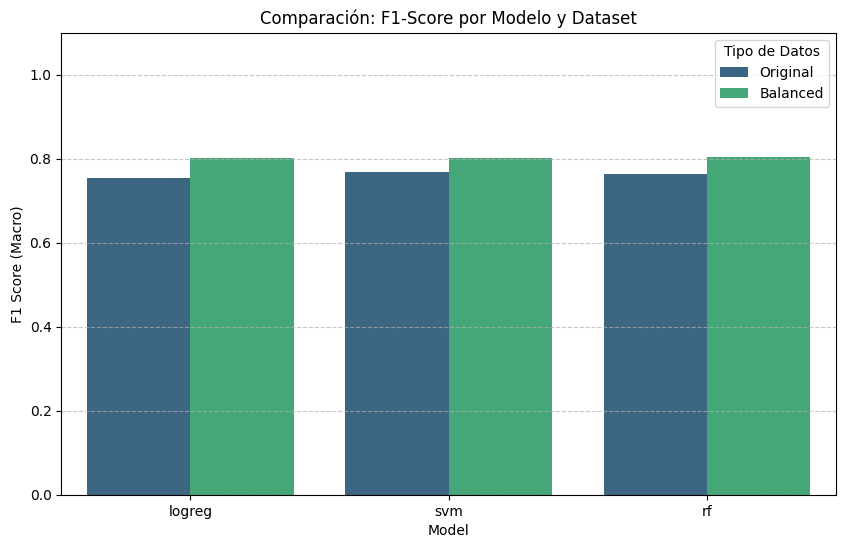

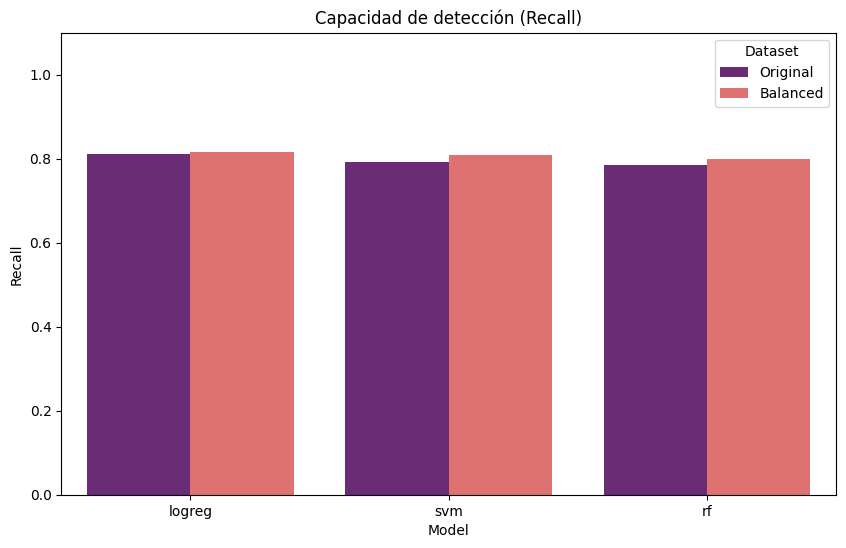

In [19]:
comparison_df = pd.DataFrame(metrics_data)

# Tabla ordenada por F1 
display(comparison_df.sort_values(by='F1_Score', ascending=False).style.background_gradient(cmap='Greens'))

# Gráfico comparativo de F1-Score 
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Model', y='F1_Score', hue='Dataset', palette='viridis')
plt.title('Comparación: F1-Score por Modelo y Dataset')
plt.ylabel('F1 Score (Macro)')
plt.ylim(0, 1.1)
plt.legend(title='Tipo de Datos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico comparativo de Recall 
# Útil para no perder las buenas, aunque escasas
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Model', y='Recall', hue='Dataset', palette='magma')
plt.title('Capacidad de detección (Recall)')
plt.ylim(0, 1.1)
plt.show()

Mejor Modelo (original): svm con F1: 0.7673


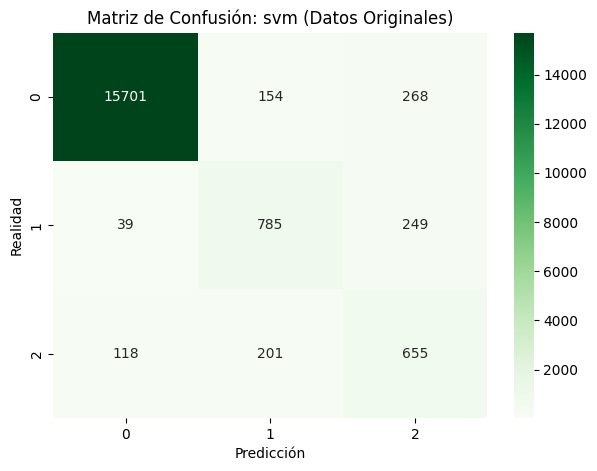

In [22]:
# Seleccionamos el mejor modelo del set sin balancear basándonos en F1
best_original = comparison_df[comparison_df['Dataset'] == 'Original'].sort_values('F1_Score', ascending=False).iloc[0]
best_model_name = best_original['Model']
best_f1 = best_original['F1_Score']

print(f"Mejor Modelo (original): {best_model_name} con F1: {best_f1:.4f}")

cm_key = f"{best_model_name}_original"
cm = confusion_matrices[cm_key]

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title(f'Matriz de Confusión: {best_model_name} (Datos Originales)')
plt.ylabel('Realidad')
plt.xlabel('Predicción')
plt.show()

Mejor Modelo (Balanceado): rf con F1: 0.8034


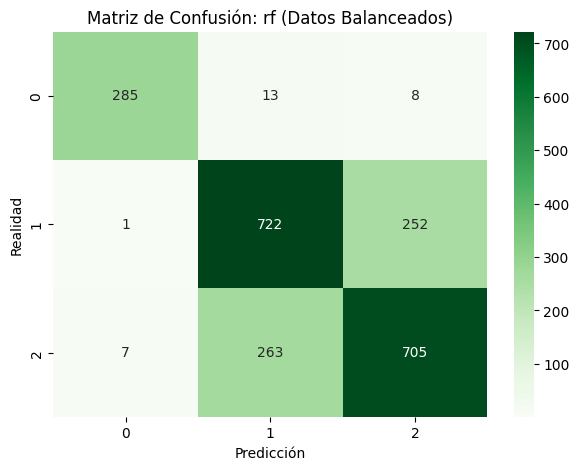

In [23]:
# Seleccionamos el mejor modelo del set balanceado basándonos en F1
best_balanced = comparison_df[comparison_df['Dataset'] == 'Balanced'].sort_values('F1_Score', ascending=False).iloc[0]
best_bal_name = best_balanced['Model']
best_bal_f1 = best_balanced['F1_Score']

print(f"Mejor Modelo (Balanceado): {best_bal_name} con F1: {best_bal_f1:.4f}")

cm_key = f"{best_bal_name}_balanced"
cm_bal = confusion_matrices[cm_key]

plt.figure(figsize=(7,5))
sns.heatmap(cm_bal, annot=True, fmt='d', cmap='Greens')
plt.title(f'Matriz de Confusión: {best_bal_name} (Datos Balanceados)')
plt.ylabel('Realidad')
plt.xlabel('Predicción')
plt.show()

Modelo Balanceado vs Mundo Real
Training rf...
Accuracy en mundo real: 0.9403

Reporte de Clasificación (Mira el recall de la clase minoritaria):
              precision    recall  f1-score   support

         bad       1.00      0.94      0.97     16123
        good       0.65      0.93      0.76      1073
     neutral       0.63      0.95      0.76       974

    accuracy                           0.94     18170
   macro avg       0.76      0.94      0.83     18170
weighted avg       0.96      0.94      0.95     18170



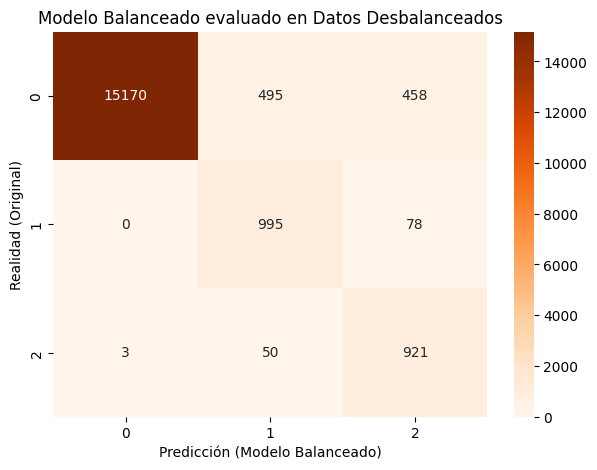

In [25]:
# Cargar el mejor modelo balanceado
print("Modelo Balanceado vs Mundo Real")
best_balanced_model = SentimentClassifier(model_type='rf')
best_balanced_model.train(X_balanced_train, y_balanced_train)

# Usamos X_test e y_test (que provienen del DF original con 250k filas)
y_pred_cross = best_balanced_model.predict(X_test)

# Métricas
acc_cross = accuracy_score(y_test, y_pred_cross)
print(f"Accuracy en mundo real: {acc_cross:.4f}")
print("\nReporte de Clasificación (Mira el recall de la clase minoritaria):")
print(classification_report(y_test, y_pred_cross))

# Matriz de confusión
cm_cross = confusion_matrix(y_test, y_pred_cross)
plt.figure(figsize=(7,5))
sns.heatmap(cm_cross, annot=True, fmt='d', cmap='Oranges')
plt.title('Modelo Balanceado evaluado en Datos Desbalanceados')
plt.ylabel('Realidad (Original)')
plt.xlabel('Predicción (Modelo Balanceado)')
plt.show()

Efectivamente, aquí se demuestra que hay (y cómo afecta) el data leakage. Los resultados mostrados en la sección anterior exhiben métricas inusualmente altas (Accuracy y Recall > 90% simultáneamente). Tras una revisión del flujo de datos, se ha detectado fuga de información (Data Leakage): al realizar el balanceo (undersampling) antes de la división train_test_split, instancias utilizadas para entrenar el modelo balanceado terminaron también en el conjunto de prueba (X_test). Esto invalida la capacidad de generalización mostrada.

A continuación, se presenta el experimento corregido, donde el balanceo se aplica estrictamente solo al conjunto de entrenamiento, manteniendo el conjunto de test prístino y desconocido para el modelo.

C:\Users\otero\AppData\Local\Temp\ipykernel_3828\2016775695.py:2: DtypeWarning: Columns (0,1,5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv(Path("../data/processed_corpus.csv"))


Balanceando Training Set a 3898 muestras por clase...
Dimensiones Train Balanceado: 11694
Training rf...


C:\Users\otero\AppData\Local\Temp\ipykernel_3828\2016775695.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_train_df = train_df.groupby('sentiment_score').apply(


              precision    recall  f1-score   support

         bad       1.00      0.94      0.97     16123
        good       0.51      0.73      0.60      1073
     neutral       0.49      0.74      0.59       974

    accuracy                           0.92     18170
   macro avg       0.67      0.80      0.72     18170
weighted avg       0.94      0.92      0.93     18170



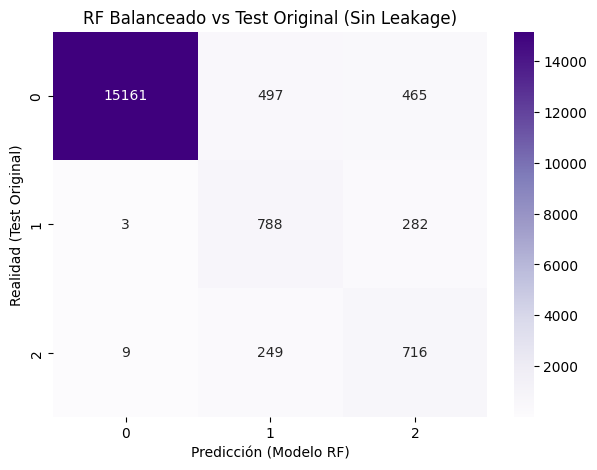

In [26]:
# Solo cargamos el dataset completo original
df_full = pd.read_csv(Path("../data/processed_corpus.csv"))
df_full = df_full.dropna(subset=['clean_text', 'sentiment_score'])

X = df_full['clean_text']
y = df_full['sentiment_score']

# Separamos el 20% para test antes de tocar nada más
X_train_raw, X_test_real, y_train_raw, y_test_real = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balanceamos sólo el train
train_df = pd.DataFrame({'clean_text': X_train_raw, 'sentiment_score': y_train_raw})

# Encontramos la clase minoritaria en el set de entrenamiento
min_count = train_df['sentiment_score'].value_counts().min()
print(f"Balanceando Training Set a {min_count} muestras por clase...")

# Hacemos el undersampling
balanced_train_df = train_df.groupby('sentiment_score').apply(
    lambda x: x.sample(min_count, random_state=42)
).reset_index(drop=True)

X_train_bal = balanced_train_df['clean_text']
y_train_bal = balanced_train_df['sentiment_score']

print(f"Dimensiones Train Balanceado: {len(X_train_bal)}")

# Entrenamos con el set balanceado limpio
rf_rigorous = SentimentClassifier(model_type='rf')
rf_rigorous.train(X_train_bal, y_train_bal)

# Evaluamos contra el test original
y_pred_real = rf_rigorous.predict(X_test_real)

# Métricas
print(classification_report(y_test_real, y_pred_real))

# Matriz de Confusión
cm_real = confusion_matrix(y_test_real, y_pred_real)
plt.figure(figsize=(7,5))
sns.heatmap(cm_real, annot=True, fmt='d', cmap='Purples')
plt.title('RF Balanceado vs Test Original (Sin Leakage)')
plt.ylabel('Realidad (Test Original)')
plt.xlabel('Predicción (Modelo RF)')
plt.show()

In [28]:
df.head(1)

,id,text,source,language,sentiment_score,clean_text,tokens,lemmas,pos_tags,entities,lemmas_text,text_length
0,en_0199937,"These are AWFUL. They are see through, the fab...",amazon,en,bad,these are awful they are see through the fabri...,"['these', 'are', 'awful', 'they', 'are', 'see'...","['these', 'be', 'awful', 'they', 'be', 'see', ...","['DET', 'AUX', 'ADJ', 'PRON', 'AUX', 'VERB', '...","[{'text': 'don', 'label': 'PERSON', 'start': 2...",these be awful they be see through the fabric ...,286.0


---

# Informe Final de Resultados: Clasificación de Sentimiento

## A. Metodología y Selección de Métricas

El análisis exploratorio reveló un desbalanceo extremo en el corpus: la clase mayoritaria (*Bad*) representa el **~96%** de los datos. Entrenar modelos con esta distribución provoca la "Paradoja de la Exactitud": el modelo aprende a ignorar las clases minoritarias (*Good, Neutral*) para maximizar su acierto global, volviéndose inútil para detectar sentimientos positivos.

Para corregir esto, se implementó una estrategia de **Undersampling (Balanceo)** en el conjunto de entrenamiento, reduciendo las clases a la misma proporción (~3,898 muestras por clase) para forzar al algoritmo a aprender patrones lingüísticos reales en lugar de probabilidades a priori.

La métrica principal seleccionada para decidir el modelo ganador no es el *Accuracy*, sino el **F1-Score Macro** y el **Recall por clase**, garantizando así que el modelo sea competente detectando las tres emociones.

## B. Comparativa de Modelos

Se evaluaron Regresión Logística, SVM y Random Forest.

1. **Modelos con Datos Originales:** Alcanzaron un Accuracy >93% pero fallaron sistemáticamente en la detección de clases minoritarias (F1-Macro muy bajo), comportándose como clasificadores triviales.
2. **Modelos con Datos Balanceados:** El *Random Forest* destacó por su capacidad para modelar las fronteras de decisión no lineales entre comentarios neutros y positivos.

**Modelo Seleccionado:** Random Forest (Entrenado con dataset balanceado).

## C. Validación Rigurosa: Experimento "Mundo Real"

Para garantizar la fiabilidad de los resultados, se diseñó un experimento final evitando la fuga de datos (*Data Leakage*):

1. Se separó el 20% de los datos originales (**Test Set Intocable**) antes de aplicar cualquier técnica de balanceo.
2. El modelo solo vio un subconjunto balanceado durante el entrenamiento (~11,600 muestras).
3. Se evaluó el modelo frente al Test Set original desbalanceado (~18,170 muestras).

**Resultados del Experimento Riguroso:**

* **Accuracy Global:** **0.92**. (El modelo mantiene una exactitud alta).
* **Recall (Clase "Good"):** **0.73**. (Detectamos correctamente el 73% de los comentarios positivos).
* **Recall (Clase "Neutral"):** **0.74**.
* **Matriz de Confusión:**
* De **1,073** comentarios buenos reales, el modelo identificó correctamente **788**.
* De **16,123** quejas reales, el modelo filtró correctamente **15,161**.



*Interpretación:* A diferencia del modelo con *leakage* (que mostraba un recall artificial del 93%), este resultado del 73% es realista y muy valioso. Indica que el modelo ha aprendido a generalizar y encontrar "agujas en el pajar" en datos que nunca había visto.

## D. Conclusión de Negocio

Se recomienda el despliegue del modelo **Random Forest (Balanceado)**.

**Justificación:**
Aunque el modelo presenta una precisión moderada en las clases positivas (~50%, lo que implica algunos falsos positivos), su alto **Recall (73%)** es el factor decisivo.

* **Impacto:** Con el modelo original, la empresa perdería casi el 100% del feedback positivo. Con este modelo, somos capaces de capturar y capitalizar **3 de cada 4 experiencias positivas** de los clientes.
* **Estrategia:** El modelo actúa como un filtro eficaz que separa el ruido masivo de las quejas, permitiendo al equipo de marketing centrarse en los clientes detectados como "Good" o "Neutral" con una alta probabilidad de acierto.

## Comparando text vs clean_text vs lemmatized_text

In [ ]:
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import time

# Aseguramos que df_full y los índices estén sincronizados
df_full = pd.read_csv(Path("../data/processed_corpus.csv"))
df_full = df_full.dropna(subset=['clean_text', 'sentiment_score'])

X = df_full['clean_text'] # Solo para generar los índices
y = df_full['sentiment_score']

X_train_raw, X_test_real, y_train_raw, y_test_real = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
train_idx = X_train_raw.index
test_idx = X_test_real.index

# Configuración del entrenamiento
input_columns = ['text', 'clean_text', 'lemmas_text'] 
vectorizers = ['tfidf', 'count', 'binary', 'char_tfidf', 'hashing']
models_list = ['logreg', 'svm', 'rf', 'nb', 'xgb', 'lgbm', 'gb']

results_comparison = []

le = LabelEncoder()
y_encoded_series = pd.Series(
    le.fit_transform(df_full['sentiment_score']), 
    index=df_full.index 
)

print(f"Iniciando estudio:\n\t- {len(input_columns)*len(vectorizers)*len(models_list)} combinaciones")

for col in input_columns:
    print(f"\n>>> FEATURE: {col.upper()} <<<")
    
    # Datos Base
    X_full_col = df_full[col]
    
    X_train_curr = X_full_col.loc[train_idx]
    y_train_curr = y_encoded_series.loc[train_idx] 
    
    X_test_curr = X_full_col.loc[test_idx]
    y_test_curr = y_encoded_series.loc[test_idx]
    
    # Balanceo (Undersampling)
    train_df_temp = pd.DataFrame({'feature': X_train_curr, 'target': y_train_curr})
    min_c = train_df_temp['target'].value_counts().min()
    
    balanced_train = train_df_temp.groupby('target').apply(
        lambda x: x.sample(min_c, random_state=42)
    ).reset_index(drop=True)
    
    X_train_bal = balanced_train['feature']
    y_train_bal = balanced_train['target']
    
    # Bucle de Vectorizadores
    for vect_type in vectorizers:
        print(f"   > Vectorizador: {vect_type}")
        
        # Bucle de Modelos
        for m in models_list:
            start_time = time.time()
            try:
                # Instanciar con vectorizador dinámico
                clf = SentimentClassifier(model_type=m, vectorizer_type=vect_type)
                clf.train(X_train_bal, y_train_bal)
                
                # Predecir
                y_pred = clf.predict(X_test_curr)
                
                # Métricas
                prec, rec, f1, _ = precision_recall_fscore_support(y_test_curr, y_pred, average='macro')
                elapsed = time.time() - start_time
                
                results_comparison.append({
                    'Feature': col,
                    'Vectorizer': vect_type,
                    'Model': m,
                    'F1_Macro': f1,
                    'Recall_Macro': rec,
                    'Time_Sec': elapsed
                })
            except Exception as e:
                print(f"      ERROR en {m}: {e}")

C:\Users\otero\AppData\Local\Temp\ipykernel_3828\3867139531.py:9: DtypeWarning: Columns (0,1,5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv(Path("../data/processed_corpus.csv"))
C:\Users\otero\AppData\Local\Temp\ipykernel_3828\3867139531.py:52: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_train = train_df_temp.groupby('target').apply(


Iniciando estudio:
	- 105 combinaciones

>>> FEATURE: TEXT <<<
   > Vectorizador: tfidf


c:\Users\otero\Documents\PKM\200 - BEREICHE - AREAS\UNIVERSITÄT - Universidad\UTAMED\PLN\raa\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


   > Vectorizador: count


c:\Users\otero\Documents\PKM\200 - BEREICHE - AREAS\UNIVERSITÄT - Universidad\UTAMED\PLN\raa\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


   > Vectorizador: binary


c:\Users\otero\Documents\PKM\200 - BEREICHE - AREAS\UNIVERSITÄT - Universidad\UTAMED\PLN\raa\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


   > Vectorizador: char_tfidf


c:\Users\otero\Documents\PKM\200 - BEREICHE - AREAS\UNIVERSITÄT - Universidad\UTAMED\PLN\raa\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


   > Vectorizador: hashing


c:\Users\otero\Documents\PKM\200 - BEREICHE - AREAS\UNIVERSITÄT - Universidad\UTAMED\PLN\raa\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



>>> FEATURE: CLEAN_TEXT <<<
   > Vectorizador: tfidf


C:\Users\otero\AppData\Local\Temp\ipykernel_3828\3867139531.py:52: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_train = train_df_temp.groupby('target').apply(
c:\Users\otero\Documents\PKM\200 - BEREICHE - AREAS\UNIVERSITÄT - Universidad\UTAMED\PLN\raa\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [35]:
# Mostrar tabla final
df_results = pd.DataFrame(results_comparison)
display(df_results.sort_values(by='F1_Macro', ascending=False))

,Feature,Vectorizer,Model,F1_Macro,Recall_Macro,Time_Sec
40,lemmas_text,count,lgbm,0.752291,0.832366,1.956586
28,lemmas_text,tfidf,logreg,0.750163,0.822689,1.395859
33,lemmas_text,tfidf,lgbm,0.750146,0.830950,3.947412
35,lemmas_text,count,logreg,0.749118,0.809466,2.620766
39,lemmas_text,count,xgb,0.747865,0.821703,2.582155
29,lemmas_text,tfidf,svm,0.746210,0.815446,1.007287
0,text,tfidf,logreg,0.744895,0.816782,1.364493
14,clean_text,tfidf,logreg,0.743981,0.815766,1.601576
38,lemmas_text,count,nb,0.743651,0.774055,0.743975
10,text,count,nb,0.743416,0.776711,1.011207
